In [54]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [55]:
def get_rewards(decisions):
    rewards = []
    for decision in decisions:
        reward = 0
        if decision is not None:
            for atomic_fact in decision:
                if atomic_fact["is_supported"]:
                    reward += 2
                else:
                    reward -= 3
        rewards.append(reward)
    return rewards

In [56]:
def get_bin_mean(x_axis, y_axis, bins):
    x_axis = np.array(x_axis)
    y_axis = np.array(y_axis)
    bin_avgs = []
    for i in range(len(bins)-1):
        idxs = np.where((x_axis >= bins[i]) & (x_axis < bins[i+1]))[0]
        # print(len(idxs))
        bin_avgs.append(np.mean(y_axis[idxs]))
    return np.array(bin_avgs)

def get_bin_median(x_axis, y_axis, bins):
    x_axis = np.array(x_axis)
    y_axis = np.array(y_axis)
    bin_avgs = []
    for i in range(len(bins)-1):
        idxs = np.where((x_axis >= bins[i]) & (x_axis < bins[i+1]))[0]
        bin_avgs.append(np.median(y_axis[idxs]))
    return np.array(bin_avgs)

import scipy
def interquartile_mean(data):
    # Sort the data
    sorted_data = np.sort(data)

    # Calculate positions of Q1 and Q3
    q1 = np.percentile(sorted_data, 25)
    q3 = np.percentile(sorted_data, 75)

    # Extract data between Q1 and Q3
    interquartile_data = sorted_data[(sorted_data >= q1) & (sorted_data <= q3)]

    # Calculate the mean of the interquartile data
    return np.mean(interquartile_data)

def get_bin_iqm(x_axis, y_axis, bins):
    x_axis = np.array(x_axis)
    y_axis = np.array(y_axis)
    bin_avgs = []
    for i in range(len(bins)-1):
        idxs = np.where((x_axis >= bins[i]) & (x_axis < bins[i+1]))[0]
        # print(len(idxs))
        bin_avgs.append(interquartile_mean(y_axis[idxs]))
    return np.array(bin_avgs)

In [57]:
with open("ckpts/sft_bios_new_llama7B/checkpoint_20000/hf_model/factscores.json", "r") as f:
    factscores = json.load(f)

with open("ckpts/sft_bios_new_llama7B/checkpoint_20000/hf_model/factscores_5000_10000.json", "r") as f:
    factscores2 = json.load(f) 

bios_llama7B_decisions = factscores["decisions"] + factscores2["decisions"]
bios_llama7B_rewards = get_rewards(bios_llama7B_decisions)

with open("biographies/factscores_train10000_gpt3pt5.json", "r") as f:
    factscores = json.load(f)

bios_gpt3pt5_decisions = factscores["decisions"]
bios_gpt3pt5_rewards = get_rewards(bios_gpt3pt5_decisions)

In [58]:
bios_num_pretrain_entities = np.load("num_pretrain_entities/bios_train_points_10000.npy")
num_entities_bins = np.array([0, 200, 400, 600, 800, 1000, np.inf])

Text(0.5, 1.0, 'Biography Generation')

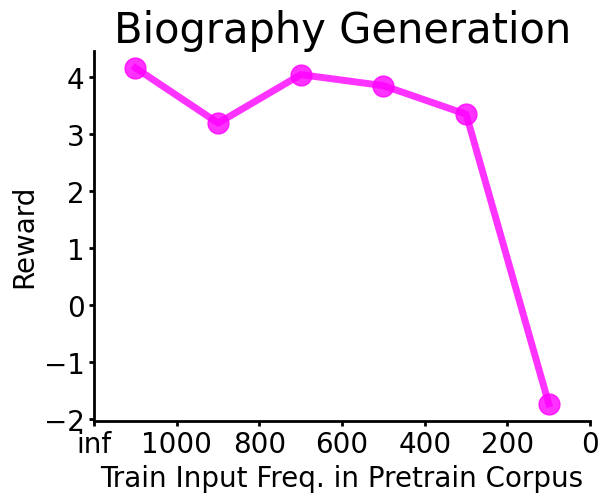

In [59]:
x = np.arange(len(num_entities_bins)-1)


binned_rewards = np.flip(get_bin_iqm(bios_num_pretrain_entities, bios_llama7B_rewards, num_entities_bins))
plt.plot(x,  np.array(binned_rewards), "o-", label="llama2 7B RM", markersize=15, linewidth=5, alpha=0.8, color="fuchsia")

# plt.legend()

plt.xticks(np.append(x, len(num_entities_bins)-1)-0.5, ["inf", "1000", "800", "600", "400", "200", "0"], fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel("Train Input Freq. in Pretrain Corpus", fontsize=20)
plt.ylabel("Reward", fontsize=20)

#make spines thicker
ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
plt.tick_params(axis='both', which='major', width=2)

#remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.legend(fontsize=20)
# plt.ylim(-7, 10)

plt.title("Biography Generation", fontsize=30)

In [60]:
with open("ckpts/sft_wikiplots_common_llama7B/checkpoint_15000/hf_model/factscores_train.json", "r") as f:
    factscores = json.load(f)
decisions = factscores["decisions"]
wikiplot_llama7B_rewards = get_rewards(decisions)

with open("movies/factscores_train_gpt3pt5.json", "r") as f:
    factscores = json.load(f)
decisions = factscores["decisions"]
wikiplot_gpt3pt5_rewards = get_rewards(decisions)

In [61]:
wikiplots_num_pretrain_entities = np.load("num_pretrain_entities/wikiplots_train_points_10000.npy")
wikiplots_num_entities_bins = np.array([0, 200, 400, 600, 800, 1000, np.inf])*2

Text(0.5, 1.0, 'Plot Generation')

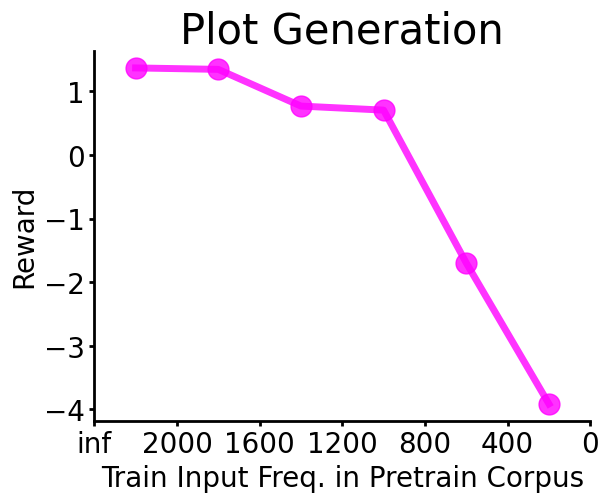

In [62]:
x = np.arange(len(wikiplots_num_entities_bins)-1)


binned_rewards = np.flip(get_bin_iqm(wikiplots_num_pretrain_entities, wikiplot_llama7B_rewards, wikiplots_num_entities_bins))
plt.plot(x,  np.array(binned_rewards), "o-", label="llama2 7B RM", markersize=15, linewidth=5, alpha=0.8, color="fuchsia")

# plt.legend()

plt.xticks(np.append(x, len(num_entities_bins)-1)-0.5, ["inf", "2000", "1600", "1200", "800", "400", "0"], fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel("Train Input Freq. in Pretrain Corpus", fontsize=20)
plt.ylabel("Reward", fontsize=20)

#make spines thicker
ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
plt.tick_params(axis='both', which='major', width=2)

#remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.legend(fontsize=20)
# plt.ylim(-7, 10)

plt.title("Plot Generation", fontsize=30)